# Coursera - Machine Learning Specialization

## Module 1: Regression

This notebook synthesize the work done during the Coursera specialization on Machine Learning. This is the work for module 1,  which focuses on regression.

Through the whole notebook, we will be using the `Graphlab Create` framework from Dato. This framework includes the `SFrame` data structure, similar to `pandas` but able to scale better to big data sets. `SFrame` can be used for free, however `Graphlab Create` is under a proprietary license but can be used for free on a yearly basis for academic purpose.

Throughout this notebook, we will be using the same dataset, namely the house sales in King County, the region where the city of Seattle, WA is located.

### 1/ Simple Linear Regression

In this part, we will implement a simple linear regression algorithm, taking only one feature in account.

In [1]:
import graphlab

Load the dataset and have a look at it:

In [2]:
sales = graphlab.SFrame('Data/kc_house_data.gl/')
sales.head()

[INFO] 1451655676 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to E:\Anaconda3\envs\CourseraML\lib\site-packages\certifi\cacert.pem
1451655676 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to uriel.tallon@laposte.net and will expire on September 25, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-12920 - Server binary: E:\Anaconda3\envs\CourseraML\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\UrielT\AppData\Local\Temp\graphlab_server_1451655677.log.0
[INFO] GraphLab Server Version: 1.7.1


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


The purpose of the exercise is to create a model able to predict the price of a house from its square footage.

First we will create the training data set and the testing data set; a seed is set to allow reproducibility. The proportion is as following:

* Training data set $\Rightarrow$ 80%
* Testing data set $\Rightarrow$ 20%

In [3]:
train_data, test_data = sales.random_split(.8, seed = 0)

The next step is to define a function that will perform a simple linear regression, given a single feature and target features. In order to do this, we will use the closed form, meaning the gradient of the Residual Some of Square is set to 0:

$$
\nabla RSS(\omega_0,\omega_1) = \left[ \begin{array}
{r}
-2\sum_{i=1}^{N}\left[y_i - (\omega_0 + \omega_1 x_i) \right] \\
-2\sum_{i=1}^{N}\left[y_i - (\omega_0 + \omega_1 x_i) \right] x_i
\end{array} \right] = 0
$$

This allows us to compute the formula for both the slope $\hat\omega_1$ and the intercept $\hat\omega_0$:

$$\hat\omega_1 = \frac{\sum y_ix_i - \frac{\sum y_i \sum x_i}{N}}{\sum x_i^2 - \frac{\sum x_i \sum x_i}{N}}$$

$$\hat\omega_0 = \frac{\sum y_i}{N} - \hat\omega_1 \frac{\sum x_i}{N}$$

N is the number of observations.

In [4]:
def simple_linear_regression(input_feature, output):
    # compute the sum of input_feature and output
    sum_input = input_feature.sum()
    sum_output = output.sum()
    # compute the product of the output and the input_feature and its sum
    in_out_prod = input_feature*output
    sum_in_out_prod = in_out_prod.sum()
    # compute the squared value of the input_feature and its sum
    squ_input = input_feature**2
    sum_squ_input = squ_input.sum()
    # comput N = number of observations
    N = float(input_feature.size())
    # use the formula for the slope
    slope = (sum_in_out_prod - (sum_input * sum_output / N)) / (sum_squ_input - (sum_input * sum_input / N))
    # use the formula for the intercept
    intercept = (sum_output / N) - (slope * sum_input / N)
    return (intercept, slope)

In order to test if the model is working by generating a fictive dataset which is strictly linear in its from:

$$
y_i = 1 + 1.x_i \Rightarrow
\left[ \begin{array}
{r}
\hat\omega_0 = 1.0 \\
\hat\omega_1 = 1.0
\end{array} \right]
$$

If the model returns the right values for this dataset, then we can validate it

In [9]:
(test_intercept, test_slope) =  simple_linear_regression(graphlab.SArray(range(5)),
                                                         graphlab.SArray(1 + 1*graphlab.SArray(range(5))))
print('Intercept: {:.2f}'.format(test_intercept))
print('Slope: {:.2f}'.format(test_slope))

Intercept: 1.00
Slope: 1.00


Now we use the training dataset to compute both the slope and the intercept:

In [10]:
sqft_intercept, sqft_slope = simple_linear_regression(train_data['sqft_living'], train_data['price'])

print('Intercept: {:.2f}'.format(sqft_intercept))
print('Slope: {:.2f}'.format(sqft_slope))

Intercept: -47116.08
Slope: 281.96


Using the computed slope and intercept, it is possible to compute the price from an arbitrary square footage:

In [11]:
def get_regression_predictions(input_feature, intercept, slope):
    # calculate the predicted values:
    predicted_values = input_feature * slope + intercept
    return predicted_values

In [12]:
my_house_sqft = 2650
estimated_price = get_regression_predictions(my_house_sqft, sqft_intercept, sqft_slope)
print('The estimated price for a house with {} squarefeet is {:.2f}'.format(my_house_sqft, estimated_price))

The estimated price for a house with 2650 squarefeet is 700074.85


Then we compute the RSS (Residual Sum of Squares), which is defined as the sum of the squared difference between the actual values $y_i$ and the predicted values $\hat y_i$:

$$RSS = \sum_{i=1}^{N} \left( y_i - \hat y_i \right)^2$$

In [13]:
def get_residual_sum_of_squares(input_feature, output, intercept, slope):
    # First get the predictions
    predictions = input_feature * slope + intercept
    # then compute the residuals (since we are squaring it doesn't matter which order you subtract)
    residuals = predictions - output
    # square the residuals and add them up
    RSS = (residuals ** 2).sum() 
    return(RSS)

Now let's compute the RSS on the training data:

In [14]:
print('The RSS of predicting Prices based on Square Feet is : {}'.
      format(get_residual_sum_of_squares(train_data['sqft_living'], train_data['price'], sqft_intercept, sqft_slope)))

The RSS of predicting Prices based on Square Feet is : 1.20191835632e+15


It is also possible to reverse the prediction, getting the square footage of a house given its price. Remember the equation of the model is $y_i = \omega_0 + \omega_1x_i$, so basically $x_i = \frac{y_i - \omega_0}{\omega_1}$ which gives us the square footage.

In [15]:
def inverse_regression_predictions(output, intercept, slope):
    # solve output = intercept + slope*input_feature for input_feature. Use this equation to compute the inverse predictions:
    estimated_feature = float(output - intercept) / slope
    return estimated_feature

In [17]:
my_house_price = 800000
estimated_squarefeet = inverse_regression_predictions(my_house_price, sqft_intercept, sqft_slope)
print('The estimated squarefeet for a house worth {} is {:.2f}'.format(my_house_price, estimated_squarefeet))

The estimated squarefeet for a house worth 800000 is 3004.40


Now, let's try to create a new model using another feature, namely the number of bedrooms:

In [18]:
bedr_intercept, bedr_slope = simple_linear_regression(train_data['bedrooms'], train_data['price'])

print('Intercept: {:.2f}'.format(bedr_intercept))
print('Slope: {:.2f}'.format(bedr_slope))

Intercept: 109473.18
Slope: 127588.95


Now let's compare both models RSS on the testing data:

In [19]:
rss_prices_on_bedr = get_residual_sum_of_squares(test_data['bedrooms'], test_data['price'], bedr_intercept, bedr_slope)
rss_prices_on_sqft = get_residual_sum_of_squares(test_data['sqft_living'], test_data['price'], sqft_intercept, sqft_slope)

print 'The RSS of predicting Prices based on Bedrooms is : ' + str(rss_prices_on_bedr)
print 'The RSS of predicting Prices based on Square Feet is : ' + str(rss_prices_on_sqft)

The RSS of predicting Prices based on Bedrooms is : 4.93364582868e+14
The RSS of predicting Prices based on Square Feet is : 2.75402936247e+14


As the RSS is lower for the model based on square footage, it performs better than the model based on the number of bedrooms.

### 2/ Multiple Regression (Interpretation)

In this part, we will be working with the built-in regression functions of `Graphlab Create`, trying to perform a linear regression with multiple features.

Testing and training data splitting will be done in the same way as before (20/80).

In [1]:
import graphlab

In [2]:
sales = graphlab.SFrame('Data/kc_house_data.gl/')
sales.head()

[INFO] 1451707958 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to E:\Anaconda3\envs\CourseraML\lib\site-packages\certifi\cacert.pem
1451707958 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to uriel.tallon@laposte.net and will expire on September 25, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-14152 - Server binary: E:\Anaconda3\envs\CourseraML\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\UrielT\AppData\Local\Temp\graphlab_server_1451707958.log.0
[INFO] GraphLab Server Version: 1.7.1


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


In [3]:
train_data, test_data = sales.random_split(.8, seed = 0)

Now we select some features from the dataset:

In [4]:
example_features = ['sqft_living', 'bedrooms', 'bathrooms']

The following cell presents how the call is made to the built-in linear regression engine of `Graphlab Create`. The model is automatically fit to the training dataset: 

In [5]:
example_model = graphlab.linear_regression.create(train_data, target = 'price',
                                                  features = example_features, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 3
PROGRESS: Number of unpacked features : 3
PROGRESS: Number of coefficients    : 4
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 1.039060     | 4146407.600631     | 258679.804477 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


Once the model is fitted, a summary of the coefficients can be printed with the following command:

In [6]:
print(example_model.get('coefficients'))

+-------------+-------+----------------+
|     name    | index |     value      |
+-------------+-------+----------------+
| (intercept) |  None | 87910.0724924  |
| sqft_living |  None | 315.403440552  |
|   bedrooms  |  None | -65080.2155528 |
|  bathrooms  |  None | 6944.02019265  |
+-------------+-------+----------------+
[4 rows x 3 columns]



The summary gives us a very convenient representation of the coefficients for each feature (including the intercept).

Getting the predictions for a particular dataset can be done through the following command:

In [8]:
print('Prediction for index 0: {:.2f}'.format(example_model.predict(train_data)[0]))

Prediction for index 0: 271789.51


Now, let's define a helper functions that will compute the Residual Sum of Squares for a particular model and dataset:

In [9]:
def get_residual_sum_of_squares(model, data, outcome):
    # First get the predictions
    predictions = model.predict(data)
    # Then compute the residuals/errors
    residuals = outcome - predictions
    # Then square and add them up
    RSS = (residuals ** 2).sum()
    return(RSS)

In [10]:
print('RSS for the example model: {}'.format(get_residual_sum_of_squares(example_model, test_data, test_data['price'])))

RSS for the example model: 2.7376153833e+14


Now, we will try to create some new features; for that, we will need the `log` function from thee `math` package:

In [11]:
from math import log

For both the training and the testing dataset, we will create the following 4 new features:

* __bedrooms_squared__ $\Rightarrow$ bedrooms x bedrooms
* __bed_bath_rooms__ $\Rightarrow$ bedrooms x bathrooms
* __log_sqft_living__ $\Rightarrow$ log(sqft_living)
* __lat_plus_long__ $\Rightarrow$ lat + long

In [12]:
train_data['bedrooms_squared'] = train_data['bedrooms'].apply(lambda x: x**2)
test_data['bedrooms_squared'] = test_data['bedrooms'].apply(lambda x: x**2)

train_data['bed_bath_rooms'] = train_data['bedrooms'] * train_data['bathrooms']
test_data['bed_bath_rooms'] = test_data['bedrooms'] * test_data['bathrooms']

train_data['log_sqft_living'] = train_data['sqft_living'].apply(lambda x: log(x))
test_data['log_sqft_living'] = test_data['sqft_living'].apply(lambda x: log(x))

train_data['lat_plus_long'] = train_data['lat'] + train_data['long']
test_data['lat_plus_long'] = test_data['lat'] + test_data['long']

The mean of each new feature on the testing dataset:

In [13]:
print('bedrooms_squared mean: {:.2f}'.format(test_data['bedrooms_squared'].mean()))
print('bed_bath_rooms mean: {:.2f}'.format(test_data['bed_bath_rooms'].mean()))
print('log_sqft_living mean: {:.2f}'.format(test_data['log_sqft_living'].mean()))
print('lat_plus_long mean: {:.2f}'.format(test_data['lat_plus_long'].mean()))

bedrooms_squared mean: 12.45
bed_bath_rooms mean: 7.50
log_sqft_living mean: 7.55
lat_plus_long mean: -74.65


The new features have the following properties:

* Squaring the bedrooms will increase the difference between the houses that have not many bedrooms (`1^2 = 1`) and those that have lots of them (`4^2 = 16`); consequently, houses with many bedrooms will be mainly affected.
* Bedrooms times bathrooms creates a so-called _interaction feature_: it is large when both of them are large.
* Taking the log of squarefeet has the advantage of bringing the large values together while spreading out the smaller values.
* Adding latitude and longitude is... errh, non-sensical; but we'll give it a try anyway.

Now, we will fit 3 different models:

* __Model 1:__ sqft_living / bedrooms / bathrooms / lat / long
* __Model 2:__ same as model 1 plus bed_bath_rooms
* __Model 3:__ same as model 2 plus bedrooms_squared / log_sqft_living / lat_plus_long

In [14]:
model_1_features = ['sqft_living', 'bedrooms', 'bathrooms', 'lat', 'long']
model_2_features = model_1_features + ['bed_bath_rooms']
model_3_features = model_2_features + ['bedrooms_squared', 'log_sqft_living', 'lat_plus_long']

Now we will fit each model:

In [15]:
model_1 = graphlab.linear_regression.create(train_data, target = 'price',
                                                  features = model_1_features, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 5
PROGRESS: Number of unpacked features : 5
PROGRESS: Number of coefficients    : 6
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.044002     | 4074878.213098     | 236378.596455 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [16]:
model_2 = graphlab.linear_regression.create(train_data, target = 'price',
                                                  features = model_2_features, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 6
PROGRESS: Number of unpacked features : 6
PROGRESS: Number of coefficients    : 7
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.054003     | 4014170.932928     | 235190.935428 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


In [17]:
model_3 = graphlab.linear_regression.create(train_data, target = 'price',
                                                  features = model_3_features, 
                                                  validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 17384
PROGRESS: Number of features          : 9
PROGRESS: Number of unpacked features : 9
PROGRESS: Number of coefficients    : 10
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.047002     | 3193229.177904     | 228200.043154 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:


Now we can extract the coefficients for each model:

In [18]:
print('Coefficients for model 1:')
print(model_1.get("coefficients"))
print('Coefficients for model 2:')
print(model_2.get("coefficients"))
print('Coefficients for model 3:')
print(model_3.get("coefficients"))

Coefficients for model 1:
+-------------+-------+----------------+
|     name    | index |     value      |
+-------------+-------+----------------+
| (intercept) |  None | -56140675.7448 |
| sqft_living |  None | 310.263325778  |
|   bedrooms  |  None | -59577.1160681 |
|  bathrooms  |  None | 13811.8405418  |
|     lat     |  None |  629865.7895   |
|     long    |  None | -214790.285183 |
+-------------+-------+----------------+
[6 rows x 3 columns]

Coefficients for model 2:
+----------------+-------+----------------+
|      name      | index |     value      |
+----------------+-------+----------------+
|  (intercept)   |  None | -54410676.1156 |
|  sqft_living   |  None | 304.449298056  |
|    bedrooms    |  None | -116366.04323  |
|   bathrooms    |  None | -77972.3305133 |
|      lat       |  None | 625433.834968  |
|      long      |  None | -203958.602957 |
| bed_bath_rooms |  None | 26961.6249091  |
+----------------+-------+----------------+
[7 rows x 3 columns]

Coefficien

Finally, let's compute the RSS for each model on the testing data set:

In [19]:
print('RSS for model 1: {}'.format(get_residual_sum_of_squares(model_1, test_data, test_data['price'])))
print('RSS for model 2: {}'.format(get_residual_sum_of_squares(model_2, test_data, test_data['price'])))
print('RSS for model 3: {}'.format(get_residual_sum_of_squares(model_3, test_data, test_data['price'])))

RSS for model 1: 2.26568089093e+14
RSS for model 2: 2.24368799994e+14
RSS for model 3: 2.51829318963e+14


As we can see, the lowest RSS is for model 2.

### 3/ Multpile Regression (Gradient Descent)

In this part, we will use `Graphlab Create` alongside `numpy` to solve the regression weights with gradient descent. The gradient ddescent algorithm will be actually implemented and tested through both simple and multiple linear regressions.

As we will use the `Graphlab` function `.to_numpy()`, one must ensure `Graphlab` version is at least 1.7.

In [1]:
import graphlab
import numpy as np
from math import sqrt

In [2]:
graphlab.__VERSION__

'1.7.1'

Now load the dataset and split beetween testing and training data:

In [3]:
sales = graphlab.SFrame('Data/kc_house_data.gl/')
sales.head()

[INFO] 1451721365 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to E:\Anaconda3\envs\CourseraML\lib\site-packages\certifi\cacert.pem
1451721365 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to uriel.tallon@laposte.net and will expire on September 25, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-6256 - Server binary: E:\Anaconda3\envs\CourseraML\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\UrielT\AppData\Local\Temp\graphlab_server_1451721365.log.0
[INFO] GraphLab Server Version: 1.7.1


id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


In [4]:
train_data, test_data = sales.random_split(.8, seed = 0)

Now, let's create a helper function which will return 2 numpy arrays:

* A matrix of features
* A vector of target values

Parameters will be the dataset from which the values should be taken, an list of features and the label for the target values. For this part, we explicitly add a constant value for the intercept. 

In [5]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

A basic test to get the first row of the resulting array for the *sqft_living* feature and the first value of the resulting array for the target value *price*:

In [6]:
print('Features matrix first row: {}'.format(get_numpy_data(sales, ['sqft_living'], 'price')[0][0, :]))
print('Prices vector first value: {}'.format(get_numpy_data(sales, ['sqft_living'], 'price')[1][0]))

Features matrix first row: [  1.00000000e+00   1.18000000e+03]
Prices vector first value: 221900.0


The next helper function will return the predicted values, given a features matrix and a vector of weights; this is similar to implement the following:

$$\hat y = H . weights$$

In [7]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    predictions = np.dot(feature_matrix, weights)
    return(predictions)

Now, we have to define a function that will compute the derivative of the regression cost function. Knowing the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, for k features and a single constant we have:

$$
F = \left(
w_0 * [CONSTANT] + w_1 * [feature_1] + \dots + w_i * [feature_i] + \dots + w_k * [feature_k] - output 
\right)^2
$$

So the derivative with respect to weight $w_i$ is:

$$
\frac{\partial F}{\partial w_i} =
2 * \left( 
w_0 * [CONSTANT] + w_1 * [feature_1] + \dots + w_i * [feature_i] + \dots + w_k * [feature_k] - output 
\right) * [feature_i]
$$

The term inside the parenthesis is just the error (or difference between predicted and actual output), so the whole equation can be rewritten as:

$$
\frac{\partial F}{\partial w_i} =
2 * Error * [feature_i]
$$

This can be interpreted as twice the dot product between:

* The difference between the predicted and the actual outputs.
* The $i^{th}$ feature vector

In [8]:
def feature_derivative(errors, feature):
    # Assume that errors and feature are both numpy arrays of the same length (number of data points)
    derivative = 2 * np.dot(errors, feature)
    return(derivative)

Then, we implement a function performing the gradient descent. The principle is: given a starting point, we update the current weights by moving in the negative gradient direction (gradient is the direction of *increase*, therefore negative gradient is the direction of *decrease*), attempting to minimize the cost function.

A `step_size` is defined, representing the amount by which we are moving in the negative direction and we stop when we are *sufficiently close* to the optimum (defined as the magnitude of the gradient vector to be smaller than a predefined `tolerance`).

The defined function will print the magnitude of the gradient at each step, giving the number of iterations and ensuring we are not diverging...

In [9]:
def regression_gradient_descent(feature_matrix, output, initial_weights, step_size, tolerance):
    converged = False 
    weights = np.array(initial_weights)
    num_iter = 1
    while not converged:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        predictions = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        errors = predictions - output
        gradient_sum_squares = 0 # initialize the gradient sum of squares
        # while we haven't reached the tolerance yet, update each feature's weight
        for i in range(len(weights)): # loop over each weight
            # Recall that feature_matrix[:, i] is the feature column associated with weights[i]
            # compute the derivative for weight[i]:
            derivative = feature_derivative(errors, feature_matrix[:, i])
            # add the squared value of the derivative to the gradient magnitude (for assessing convergence)
            gradient_sum_squares += (derivative ** 2)
            # subtract the step size times the derivative from the current weight
            weights[i] -= (step_size * derivative)
        # compute the square-root of the gradient sum of squares to get the gradient matnigude:
        gradient_magnitude = sqrt(gradient_sum_squares)
        print('Iteration {:<3} => Gradient Magnitude = {}'.format(num_iter, gradient_magnitude))
        if gradient_magnitude < tolerance:
            converged = True
        else:
            num_iter += 1
    print('Converged after {:<3} iterations!'.format(num_iter))
    return(weights)

Next we define the values for the gradient desscent. We will perform 2 different gradient descents:

* The first one will only take the _sqft_living_ feature in account.
* The second one will also take the _sqft_living_ feature in account but will also consider the feature _sqft_living15_, which is the average square feet for the 15 nearest neighbors.

In [10]:
simple_features = ['sqft_living']
multiple_features = ['sqft_living', 'sqft_living15']
my_output = 'price'
(simple_feature_matrix, output_simple) = get_numpy_data(train_data, simple_features, my_output)
(multiple_feature_matrix, output_multiple) = get_numpy_data(train_data, multiple_features, my_output)
initial_weights_simple = np.array([-47000., 1.])
initial_weights_multiple = np.array([-100000., 1., 1.])
step_size_simple = 7e-12
step_size_multiple = 4e-12
tolerance_simple = 2.5e7
tolerance_multiple = 1e9

First gradient descent for simple feature:

In [11]:
weights_simple = regression_gradient_descent(simple_feature_matrix,
                                             output_simple,
                                             initial_weights_simple,
                                             step_size_simple,
                                             tolerance_simple)

Iteration 1   => Gradient Magnitude = 5.05515307744e+13
Iteration 2   => Gradient Magnitude = 1.31274510235e+13
Iteration 3   => Gradient Magnitude = 3.40899608253e+12
Iteration 4   => Gradient Magnitude = 8.852635801e+11
Iteration 5   => Gradient Magnitude = 2.2988926572e+11
Iteration 6   => Gradient Magnitude = 59698688259.7
Iteration 7   => Gradient Magnitude = 15502826422.1
Iteration 8   => Gradient Magnitude = 4025844401.51
Iteration 9   => Gradient Magnitude = 1045449748.16
Iteration 10  => Gradient Magnitude = 271487891.861
Iteration 11  => Gradient Magnitude = 70504114.6955
Iteration 12  => Gradient Magnitude = 18320016.7407
Converged after 12  iterations!


Second gradient descent for multiple features:

In [12]:
weights_multiple = regression_gradient_descent(multiple_feature_matrix,
                                               output_multiple,
                                               initial_weights_multiple,
                                               step_size_multiple,
                                               tolerance_multiple)

Iteration 1   => Gradient Magnitude = 7.30720205489e+13
Iteration 2   => Gradient Magnitude = 2.26732209651e+13
Iteration 3   => Gradient Magnitude = 7.0607945821e+12
Iteration 4   => Gradient Magnitude = 2.27568239427e+12
Iteration 5   => Gradient Magnitude = 9.28984105638e+11
Iteration 6   => Gradient Magnitude = 6.56307425178e+11
Iteration 7   => Gradient Magnitude = 6.10615351821e+11
Iteration 8   => Gradient Magnitude = 5.93078765307e+11
Iteration 9   => Gradient Magnitude = 5.78705920128e+11
Iteration 10  => Gradient Magnitude = 5.64945676163e+11
Iteration 11  => Gradient Magnitude = 5.51538681425e+11
Iteration 12  => Gradient Magnitude = 5.38452422879e+11
Iteration 13  => Gradient Magnitude = 5.25676912708e+11
Iteration 14  => Gradient Magnitude = 5.1320454369e+11
Iteration 15  => Gradient Magnitude = 5.01028100319e+11
Iteration 16  => Gradient Magnitude = 4.89140559101e+11
Iteration 17  => Gradient Magnitude = 4.77535065233e+11
Iteration 18  => Gradient Magnitude = 4.6620492675

Using the weights, we will compute the predictions on the testing dataset:

In [13]:
(test_simple_feature_matrix, test_output_simple) = get_numpy_data(test_data, simple_features, my_output)
(test_multiple_feature_matrix, test_output_multiple) = get_numpy_data(test_data, multiple_features, my_output)

In [14]:
prediction_simple = predict_output(test_simple_feature_matrix, weights_simple)
prediction_multiple = predict_output(test_multiple_feature_matrix, weights_multiple)

For the simple regression, let's print the predicted value for the first entry, along with the RSS:

In [16]:
print('Predicted price of the 1st house: {:.1f}'.format(prediction_simple[0])) 
print('Predicted RSS: {}'.format(np.sum((prediction_simple - test_output_simple)**2)))

Predicted price of the 1st house: 356134.4
Predicted RSS: 2.75400047593e+14


Same thing for the multiple regression:

In [17]:
print('Predicted price of the 1st house: {:.1f}'.format(prediction_multiple[0])) 
print('Predicted RSS: {}'.format(np.sum((prediction_multiple - test_output_multiple)**2)))

Predicted price of the 1st house: 366651.4
Predicted RSS: 2.70263446465e+14


And the actual price of the first house in the testing dataset was:

In [18]:
print('Actual price of the 1st house: {:.1f}'.format(test_data['price'][0]))

Actual price of the 1st house: 310000.0


As a conclusion, we can highlight the fact that even though the multiple regression did not performed well on the first predicted value, it perfromed better generally than the simple regression, as its RSS is slightly lower.

### 4/ Assessing Performance - Exploring the Bias-Variance Tradeoff

In this part, we will compare different regression models in order to assess which model works best. Polynomial regression will be used as an example.

In particular, we will see how to use a validation dataset for better generalization. The `Matplotlib` API will be used for visual representation.

In [1]:
import graphlab
import matplotlib.pyplot as plt

%matplotlib inline

First, we will define a helper function that takes a single feature and a power as parameters and returns a `SFrame` with said feature expanded from a power of 1 to the power passed:

$$
\left[ \begin{array}
{r}
featname \\
x_0 \\
x_1 \\
\vdots \\
x_i \\
\vdots \\
x_N \\
\end{array} \right]
\Longrightarrow
\left[ \begin{array}
{rrrrrr}
power_1 & power_2 & \dots & power_j & \dots & power_D \\
x_0 & x_0^2 & \dots & x_0^j & \dots & x_0^D \\
x_1 & x_1^2 & \dots & x_1^j & \dots & x_1^D \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_i & x_i^2 & \dots & x_i^j & \dots & x_i^D \\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots \\
x_N & x_N^2 & \dots & x_N^j & \dots & x_N^D \\
\end{array} \right]
$$

In [2]:
def polynomial_sframe(feature, degree):
    if degree < 1:
        raise ValueError('Expected degree must be > 0; received {}'.format(degree))
    else:
        poly_sframe = graphlab.SFrame()
        poly_sframe['power_1'] = feature
        if degree > 1:
            for power in range(2, degree+1): 
                name = 'power_{}'.format(power)
                poly_sframe[name] = feature.apply(lambda x: x**power)
        return poly_sframe

This function will automatically raise the `ValueError` should the degree passed is invalid (negative or null).

We can have a short glimpse on how the function behaves:

In [3]:
print(polynomial_sframe(graphlab.SArray([1.0, 2.0, 3.0]), 3))

[INFO] 1451963575 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to E:\Anaconda3\envs\CourseraML\lib\site-packages\certifi\cacert.pem
1451963575 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to uriel.tallon@laposte.net and will expire on September 25, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-15484 - Server binary: E:\Anaconda3\envs\CourseraML\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\UrielT\AppData\Local\Temp\graphlab_server_1451963575.log.0
[INFO] GraphLab Server Version: 1.7.1


+---------+---------+---------+
| power_1 | power_2 | power_3 |
+---------+---------+---------+
|   1.0   |   1.0   |   1.0   |
|   2.0   |   4.0   |   8.0   |
|   3.0   |   9.0   |   27.0  |
+---------+---------+---------+
[3 rows x 3 columns]



Next, we load the dataset we are going to work on (still the same):

In [4]:
sales = graphlab.SFrame('Data/kc_house_data.gl/')
sales.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


For plotting purpose, we sort the values along `sqft_living` and break the ties according to `price`:

In [5]:
sales = sales.sort(['sqft_living', 'price'])

Next, let's make a series of plot to see how the predictions evolve with the degree of the features; we will focus on degrees 1, 2, 3 and 15:

In [6]:
def plotPolynomial(listDeg):
    plt.figure(figsize = (12, 8))
    plt.plot(sales['sqft_living'], sales['price'], '.', label = 'Original')
    for deg in listDeg:
        polyData = polynomial_sframe(sales['sqft_living'], deg)
        polyFeatures = polyData.column_names()
        polyData['price'] = sales['price']
        polyModel = graphlab.linear_regression.create(polyData, target = 'price',
                                                      features = polyFeatures,
                                                      validation_set = None, verbose = False)
        plt.plot(polyData['power_1'], polyModel.predict(polyData), '-', label = 'Degree {:<2}'.format(deg))
    plt.title('Polynomial Regression')
    plt.xlabel('Square Footage')
    plt.ylabel('Prediction')
    plt.legend(loc = 'upper left')

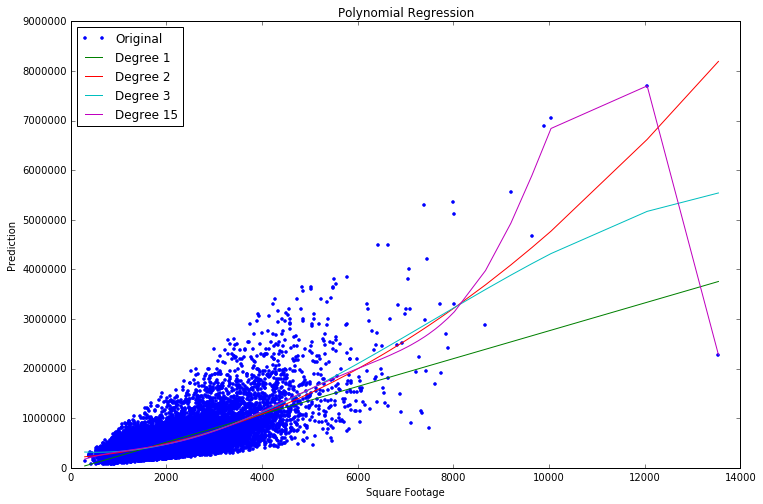

In [7]:
plotPolynomial([1, 2, 3, 15])

As we can see, Degree 1 fits a normal line to the data, while Degree 2 looks more like a quadratic fit. Degree 3 displays an inflection point.

Degree 15, on the other hand, is very wigly at the end and while it fits particularly well the scattered points on the right edge, there is agreat deal of chance we are actually _overfitting_.

Overfitting is an important concept in regression and Machine Learning. It means our model has been so finely tuned to a particular dataset that it generalizes poorly to other datasets, making it pretty useless for prediction purposes.

In the case of our degree 15 model, we can have that intuition by trying to fit it to different datasets and see how it behaves.

In [14]:
def plotDegree15():
    split_1, split_2 = sales.random_split(0.5, seed = 0)
    set_1, set_2 = split_1.random_split(0.5, seed = 0)
    set_3, set_4 = split_2.random_split(0.5, seed = 0)
    listSet = [set_1, set_2, set_3, set_4]
    plt.figure(figsize = (12, 8))
    for i, setVal in enumerate(listSet):
        polyData = polynomial_sframe(setVal['sqft_living'], 15)
        polyFeatures = polyData.column_names()
        polyData['price'] = setVal['price']
        polyData = polyData.sort(['power_1', 'price'])
        polyModel = graphlab.linear_regression.create(polyData, target = 'price',
                                                      features = polyFeatures,
                                                      validation_set = None, verbose = False)
        plt.plot(polyData['power_1'], polyModel.predict(polyData), '-', label = 'Dataset {}'.format(i+1))
    plt.title('Polynomial Regression (Degree 15)')
    plt.xlabel('Square Footage')
    plt.ylabel('Prediction')
    plt.legend(loc = 'upper left')

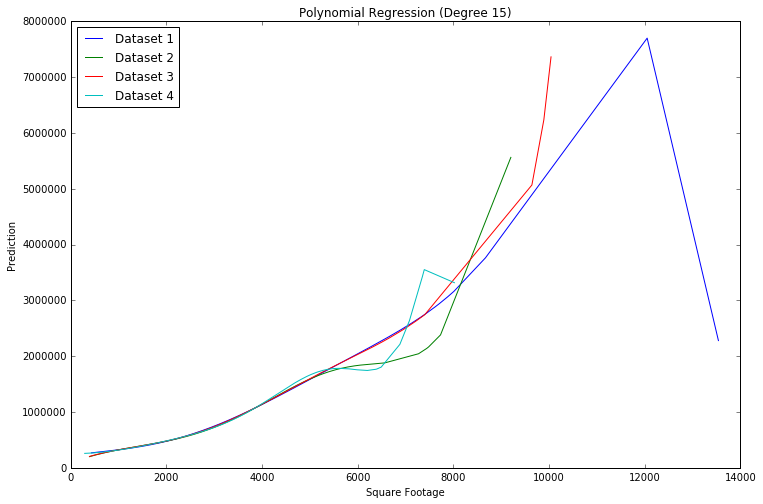

In [15]:
plotDegree15()

Above, we have created 4 different datasets of approximately similar size, then for each dataset, we have fitted a model based on the `sqft_living` feature expanded to a power of 15.

As we can see, the predictions we get are very different from one dataset to another (for square footage higher than 5800), so if we were to use the model fitted on one of those dataset to predict the values of a different dataset, we are likely to get poor results.

We can have a look to some coefficients to see how they differ from on model to another:

In [16]:
def printCoeff(k):
    split_1, split_2 = sales.random_split(0.5, seed = 0)
    set_1, set_2 = split_1.random_split(0.5, seed = 0)
    set_3, set_4 = split_2.random_split(0.5, seed = 0)
    listSet = [set_1, set_2, set_3, set_4]
    for i, setVal in enumerate(listSet):
        polyData = polynomial_sframe(setVal['sqft_living'], 15)
        polyFeatures = polyData.column_names()
        polyData['price'] = setVal['price']
        polyData = polyData.sort(['power_1', 'price'])
        polyModel = graphlab.linear_regression.create(polyData, target = 'price',
                                                      features = polyFeatures,
                                                      validation_set = None, verbose = False)
        print('Dataset {}: Coefficient "Power_{}" = {}'.format(i+1, k, polyModel.get('coefficients')[k]['value']))

printCoeff(15)

Dataset 1: Coefficient "Power_15" = 5.01975232673e-55
Dataset 2: Coefficient "Power_15" = 1.68636658317e-52
Dataset 3: Coefficient "Power_15" = 6.3904588592e-53
Dataset 4: Coefficient "Power_15" = -4.74535333101e-51


As we may have expected from the curves, the coefficients can also be veery dissimiliar from one model to another, eeven the sign can be different.

Now the question is: how to select the right degree without overfitting?

We will use the technique of _model validation_: 3 different subsets of the original dataset will be used:

* Training dataset (45% of the original data): used to fit the model.
* Validation dataset (45% of the original data): used to validate the model with RSS.
* Testing dataset (10% of the original data): used to test the validated model.

In [17]:
def multiSplit(data):
    training_and_validation, testing = data.random_split(0.9, seed = 1)
    training, validation = training_and_validation.random_split(0.5, seed = 1)
    return (training, validation, testing)

In [18]:
def findBestDegree(data):
    rssList = []
    plt.figure(figsize = (12, 8))
    for deg in range(1, 16):
        polyFrame = polynomial_sframe(data[0]['sqft_living'], deg)
        polyFeats = polyFrame.column_names()
        polyFrame['price'] = data[0]['price']
        polyModel = graphlab.linear_regression.create(polyFrame, target = 'price', features = polyFeats,
                                                      validation_set = None, verbose = False)
        polyVal = polynomial_sframe(data[1]['sqft_living'], deg)
        polyVal['price'] = data[1]['price']
        resid = polyVal['price'] - polyModel.predict(polyVal)
        rss = (resid **2).sum()
        rssList.append(rss)
    plt.plot(range(1, 16), rssList, '-')
    plt.title('Variations of RSS with Polynomial Degree')
    plt.xlabel('Polynomial Degree')
    plt.ylabel('RSS')
    plt.xticks(range(1, 16))
    bestRss = min(rssList)
    print('Best degree {:<2}, RSS = {}'.format(rssList.index(bestRss) + 1, bestRss))

Best degree 6 , RSS = 5.8918247781e+14


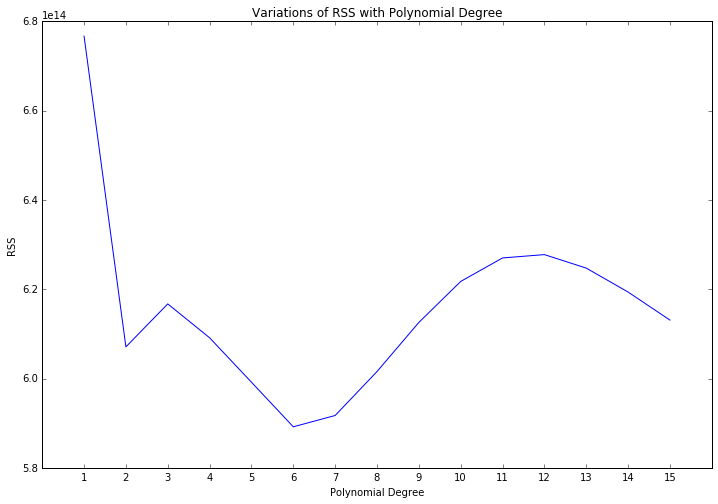

In [19]:
findBestDegree(multiSplit(sales))

The lowest RSS on the validation set is for a polynomial degree of 6. What is the RSS on the testing set for such a degree?

In [20]:
def testBestDegree(data, k):
    polyFrame = polynomial_sframe(data[0]['sqft_living'], k)
    polyFeats = polyFrame.column_names()
    polyFrame['price'] = data[0]['price']
    polyModel = graphlab.linear_regression.create(polyFrame, target = 'price', features = polyFeats,
                                                  validation_set = None, verbose = False)
    polyTest = polynomial_sframe(data[2]['sqft_living'], k)
    polyTest['price'] = data[2]['price']
    resid = polyTest['price'] - polyModel.predict(polyTest)
    rss = (resid **2).sum()
    print('For degree {:<2}, RSS on testing set is {}'.format(k, rss))

In [21]:
testBestDegree(multiSplit(sales), 6)

For degree 6 , RSS on testing set is 1.25529337848e+14


As a conclusion, we may say a complex model with lots of features is not always the best we can come up with as it tends to overfit. This however also depends on the number of observation: small datasets are easier to overfit while datasets with a large number of observations are harder to overfit.

In the next part, we will have a look on Ridge Regression and how it can help to regulate overfitting for a large number of features.